In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [1]:
#load data
import pandas as pd
import numpy as np

data = pd.read_csv('examdata.csv')
data.head()

,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


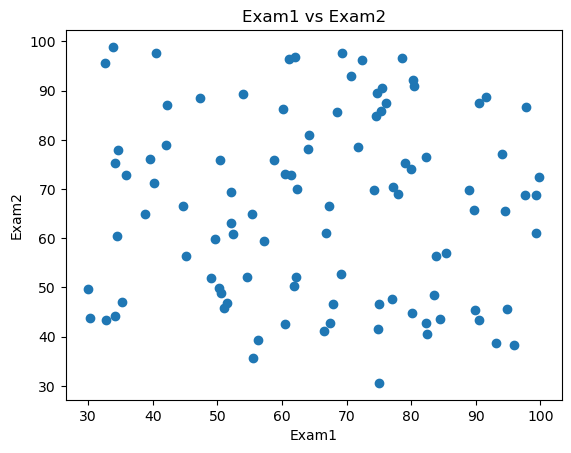

In [3]:
#visualize the data
import matplotlib.pyplot as plt
import numpy as np

fig1 = plt.figure()
plt.scatter(data.loc[:,'Exam1'],data.loc[:,'Exam2'])
plt.title('Exam1 vs Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.show()

In [6]:
#add label mask
mask = data.loc[:,'Pass'] == 1
mask.head()

0    False
1    False
2    False
3     True
4     True
Name: Pass, dtype: bool

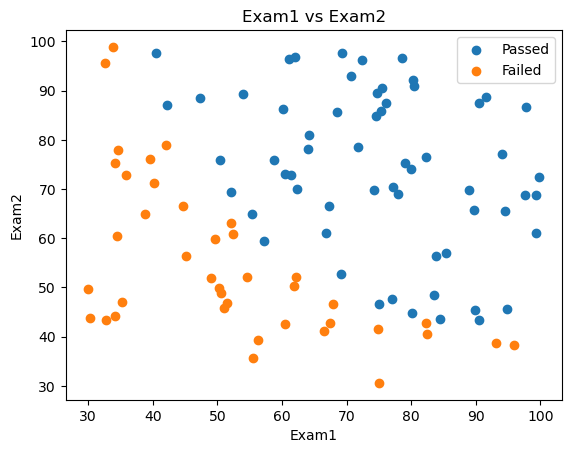

In [8]:
fig2 = plt.figure()
passed=plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed=plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.title('Exam1 vs Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('Passed','Failed'))
plt.show()

In [14]:
#define X,Y
X = data.drop(['Pass'],axis=1)
y = data.loc[:,'Pass']
X1 = data.loc[:,'Exam1']
X2 = data.loc[:,'Exam2']
y.head()

0    0
1    0
2    0
3    1
4    1
Name: Pass, dtype: int64

In [15]:
print(X.shape,y.shape)

(100, 2) (100,)


In [16]:
#establishing the model to train it
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

#training the model
LR.fit(X, y)


LogisticRegression()

In [19]:
#show the prediction result of the logistic regression model
y_pred = LR.predict(X)
print(y_pred)

[0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]


In [20]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.89


In [21]:
#predict exam1=70 exam2=65
y_test=LR.predict([[70,65]])
print(y_test)

[1]


d:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [25]:
theta0 =LR.intercept_
theta1, theta2 = LR.coef_[0][0], LR.coef_[0][1]
print(theta0, theta1, theta2)  

[-25.05219314] 0.20535491217790366 0.20058380395469028


In [27]:
X2_new = -(theta0+theta1*X1)/theta2
print(X2_new)

0     89.449169
1     93.889277
2     88.196312
3     63.282281
4     43.983773
        ...    
95    39.421346
96    81.629448
97    23.219064
98    68.240049
99    48.341870
Name: Exam1, Length: 100, dtype: float64


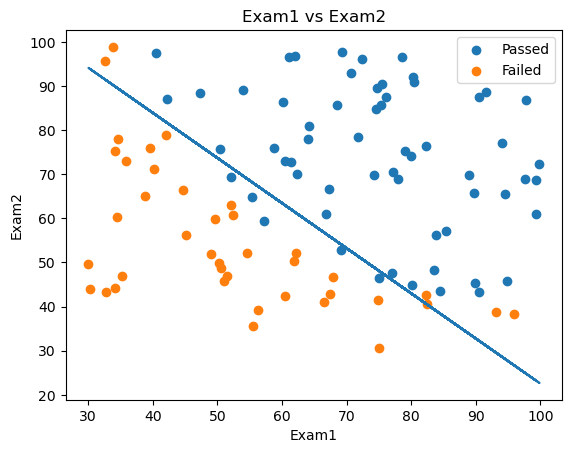

In [30]:
fig3 = plt.figure()
passed=plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed=plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.title('Exam1 vs Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('Passed','Failed'))

plt.plot(X1,X2_new)
plt.show()

In [31]:
X1

0     34.623660
1     30.286711
2     35.847409
3     60.182599
4     79.032736
        ...    
95    83.489163
96    42.261701
97    99.315009
98    55.340018
99    74.775893
Name: Exam1, Length: 100, dtype: float64

In [32]:
X2

0     78.024693
1     43.894998
2     72.902198
3     86.308552
4     75.344376
        ...    
95    48.380286
96    87.103851
97    68.775409
98    64.931938
99    89.529813
Name: Exam2, Length: 100, dtype: float64

In [33]:
X1_2=X1*X1
X2_2=X2*X2
X1_X2=X1*X2

In [36]:
X_new = {'X1':X1,'X2':X2,'X1_2':X1_2,'X2_2':X2_2,'X1_X2':X1_X2}
X_new = pd.DataFrame(X_new)
print(X_new)

           X1         X2         X1_2         X2_2        X1_X2
0   34.623660  78.024693  1198.797805  6087.852690  2701.500406
1   30.286711  43.894998   917.284849  1926.770807  1329.435094
2   35.847409  72.902198  1285.036716  5314.730478  2613.354893
3   60.182599  86.308552  3621.945269  7449.166166  5194.273015
4   79.032736  75.344376  6246.173368  5676.775061  5954.672216
..        ...        ...          ...          ...          ...
95  83.489163  48.380286  6970.440295  2340.652054  4039.229555
96  42.261701  87.103851  1786.051355  7587.080849  3681.156888
97  99.315009  68.775409  9863.470975  4730.056948  6830.430397
98  55.340018  64.931938  3062.517544  4216.156574  3593.334590
99  74.775893  89.529813  5591.434174  8015.587398  6694.671710

[100 rows x 5 columns]


In [37]:
LR2 = LogisticRegression()
LR2.fit(X_new, y)


d:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y2_predict = LR2.predict(X_new)
accuracy = accuracy_score(y, y2_predict)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [46]:
t0 = LR2.intercept_
t1,t2,t3,t4,t5 = LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]
print(t0,t1,t2,t3,t4,t5)

X1_new = X1.sort_values()

a=t4
b=t5*X1_new+t2
c=t0+t1*X1_new+t3*X1_new*X1_new

X2_new_boundary = (-b+np.sqrt(b*b-4*a*c))/(2*a)
print(X2_new_boundary)


[-15.65997019] -0.7350259042393806 -1.3848308437245846 -0.0015733938196159705 0.0035102545747043167 0.039650489484571505
63    136.648787
1     135.291980
57    122.509639
70    121.749416
36    115.757028
         ...    
56     39.038738
47     39.015720
51     38.748977
97     38.741625
75     38.653700
Name: Exam1, Length: 100, dtype: float64


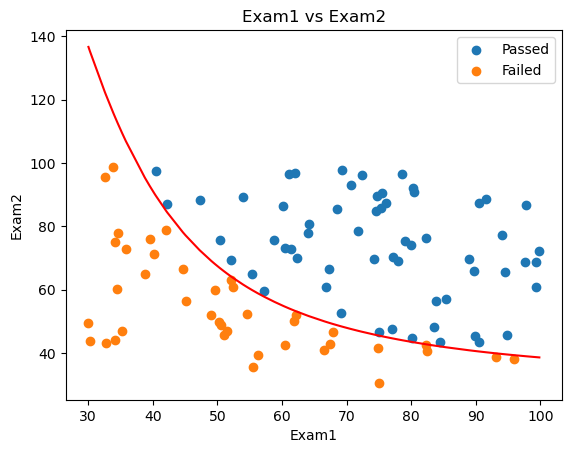

In [49]:

fig5 = plt.figure()
passed=plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed=plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.title('Exam1 vs Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('Passed','Failed'))
plt.plot(X1_new,X2_new_boundary,color='red',label='Decision Boundary')
plt.show()